# Importeer data


In [72]:
import kagglehub
import pandas as pd
import sklearn
import numpy as np 
path = kagglehub.dataset_download("arshid/iris-flower-dataset")
db = pd.read_csv(path + "/Iris.csv")
print("Path to dataset files:", path)

Path to dataset files: C:\Users\jagro\.cache\kagglehub\datasets\arshid\iris-flower-dataset\versions\1


In [73]:

db

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# Decision Tree

In [74]:
from sklearn.model_selection import train_test_split

# One-hot encode the 'species' column
db_encoded = pd.get_dummies(db, columns=['species'])

# Prepare features and labels
X_df = db_encoded.drop(columns=['species_Iris-setosa', 'species_Iris-versicolor', 'species_Iris-virginica'])
y_df = db_encoded[['species_Iris-setosa', 'species_Iris-versicolor', 'species_Iris-virginica']]

X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.2, random_state=42)

list(X_df.columns)

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# MAX DEPTH

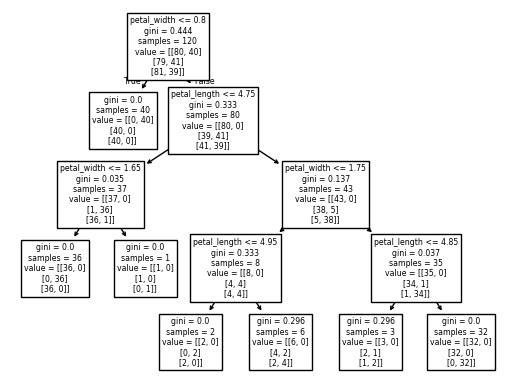

In [75]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics
import matplotlib.pyplot as plt

dtree = DecisionTreeClassifier(max_depth=4)
dtree = dtree.fit(X_train, y_train)
tree.plot_tree(dtree, feature_names=X_df.columns)
plt.show()

In [76]:
# Create a DataFrame for predicted labels with appropriate column names
predicted_df = pd.DataFrame(dtree.predict(X_test), columns=y_test.columns)
predicted_df = predicted_df.add_prefix('Predicted_')

# Concatenate true and predicted labels for comparison
model_results_frame = pd.concat([y_test.reset_index(drop=True), predicted_df.reset_index(drop=True)], axis=1)
model_results_frame

,species_Iris-setosa,species_Iris-versicolor,species_Iris-virginica,Predicted_species_Iris-setosa,Predicted_species_Iris-versicolor,Predicted_species_Iris-virginica
0,False,True,False,False,True,False
1,True,False,False,True,False,False
2,False,False,True,False,False,True
3,False,True,False,False,True,False
4,False,True,False,False,True,False
5,True,False,False,True,False,False
6,False,True,False,False,True,False
7,False,False,True,False,False,True
8,False,True,False,False,True,False
9,False,True,False,False,True,False


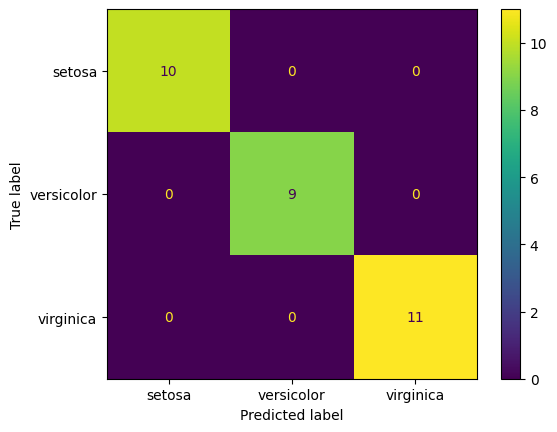

In [77]:
# Convert one-hot encoded columns to single label values
true_labels = np.argmax(model_results_frame.iloc[:, :3].values, axis=1)
pred_labels = np.argmax(model_results_frame.iloc[:, 3:].values, axis=1)

confusion_matrix = metrics.confusion_matrix(true_labels, pred_labels)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=['setosa', 'versicolor', 'virginica'])

cm_display.plot()
plt.show()

In [78]:
best_accuracy = 0
best_depth = 0

max_depths = range(1, 40)
for depth in max_depths:
    dtree = DecisionTreeClassifier(max_depth=depth)
    dtree = dtree.fit(X_train, y_train)
    
    y_pred = dtree.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    
    print(f"Max depth: {depth}, Accuracy: {accuracy:.4f}")
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_depth = depth

print(f"\n🎯 Highest Accuracy: {best_accuracy:.4f} at Max Depth: {best_depth}")

Max depth: 1, Accuracy: 0.6333
Max depth: 2, Accuracy: 0.9667
Max depth: 3, Accuracy: 0.9667
Max depth: 4, Accuracy: 1.0000
Max depth: 5, Accuracy: 1.0000
Max depth: 6, Accuracy: 1.0000
Max depth: 7, Accuracy: 1.0000
Max depth: 8, Accuracy: 1.0000
Max depth: 9, Accuracy: 1.0000
Max depth: 10, Accuracy: 1.0000
Max depth: 11, Accuracy: 1.0000
Max depth: 12, Accuracy: 1.0000
Max depth: 13, Accuracy: 1.0000
Max depth: 14, Accuracy: 1.0000
Max depth: 15, Accuracy: 1.0000
Max depth: 16, Accuracy: 1.0000
Max depth: 17, Accuracy: 1.0000
Max depth: 18, Accuracy: 1.0000
Max depth: 19, Accuracy: 1.0000
Max depth: 20, Accuracy: 1.0000
Max depth: 21, Accuracy: 1.0000
Max depth: 22, Accuracy: 1.0000
Max depth: 23, Accuracy: 1.0000
Max depth: 24, Accuracy: 1.0000
Max depth: 25, Accuracy: 1.0000
Max depth: 26, Accuracy: 1.0000
Max depth: 27, Accuracy: 1.0000
Max depth: 28, Accuracy: 1.0000
Max depth: 29, Accuracy: 1.0000
Max depth: 30, Accuracy: 1.0000
Max depth: 31, Accuracy: 1.0000
Max depth: 32, Ac

In [79]:
metrics.accuracy_score(true_labels, pred_labels)

1.0

# Logic Regression

In [80]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

In [81]:
db
X = db.drop(columns=['species'])
y = db['species']
y = pd.get_dummies(y)
y

,Iris-setosa,Iris-versicolor,Iris-virginica
0,True,False,False
1,True,False,False
2,True,False,False
3,True,False,False
4,True,False,False
...,...,...,...
145,False,False,True
146,False,False,True
147,False,False,True
148,False,False,True


In [82]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = 0.25,
    random_state = 40
)

In [83]:
reg_model = linear_model.LinearRegression()
reg_model = LinearRegression().fit(X_train, y_train)
reg_model

LinearRegression()

In [84]:
y_pred= reg_model.predict(X_test)
y_pred

array([[ 0.84005942,  0.30286877, -0.1429282 ],
       [ 0.11818114,  0.34314302,  0.53867584],
       [-0.02168387,  0.08262775,  0.93905612],
       [-0.11766234,  0.19555258,  0.92210976],
       [ 0.13527393,  0.52481415,  0.33991192],
       [-0.06144809,  0.01512491,  1.04632319],
       [-0.00398649,  0.65967955,  0.34430695],
       [ 0.13801728,  0.48939189,  0.37259083],
       [ 0.10487497,  0.33724   ,  0.55788503],
       [ 0.95211151,  0.19523368, -0.14734519],
       [ 0.07365792,  0.60447102,  0.32187106],
       [ 0.88106791,  0.21976073, -0.10082864],
       [ 0.97429599,  0.08946657, -0.06376255],
       [ 0.0299739 ,  0.35702627,  0.61299983],
       [ 0.30087634,  0.53556333,  0.16356034],
       [-0.08429793,  0.03810682,  1.04619111],
       [-0.00584942,  0.41549776,  0.59035166],
       [-0.05635487,  0.21548326,  0.84087161],
       [ 0.09783546,  0.55211177,  0.35005277],
       [ 0.17106609,  0.37874209,  0.45019182],
       [-0.16238808,  0.33088523,  0.831

In [85]:
prediction_df = pd.DataFrame(y_pred)
prediction_df = prediction_df.rename(columns = {0 : 'Predicted_setosa', 1 : 'Predicted_versicolor', 2 : 'Predicted_virginica'}) 
prediction_df

,Predicted_setosa,Predicted_versicolor,Predicted_virginica
0,0.840059,0.302869,-0.142928
1,0.118181,0.343143,0.538676
2,-0.021684,0.082628,0.939056
3,-0.117662,0.195553,0.922110
4,0.135274,0.524814,0.339912
5,-0.061448,0.015125,1.046323
6,-0.003986,0.659680,0.344307
7,0.138017,0.489392,0.372591
8,0.104875,0.337240,0.557885
9,0.952112,0.195234,-0.147345


In [86]:
# Concatenate y_test and prediction_df for comparison
y_test_prediction_merge = pd.concat([y_test.reset_index(drop=True), prediction_df], axis=1)
y_test_prediction_merge

,Iris-setosa,Iris-versicolor,Iris-virginica,Predicted_setosa,Predicted_versicolor,Predicted_virginica
0,True,False,False,0.840059,0.302869,-0.142928
1,False,True,False,0.118181,0.343143,0.538676
2,False,False,True,-0.021684,0.082628,0.939056
3,False,False,True,-0.117662,0.195553,0.922110
4,False,True,False,0.135274,0.524814,0.339912
5,False,False,True,-0.061448,0.015125,1.046323
6,False,True,False,-0.003986,0.659680,0.344307
7,False,True,False,0.138017,0.489392,0.372591
8,False,True,False,0.104875,0.337240,0.557885
9,True,False,False,0.952112,0.195234,-0.147345


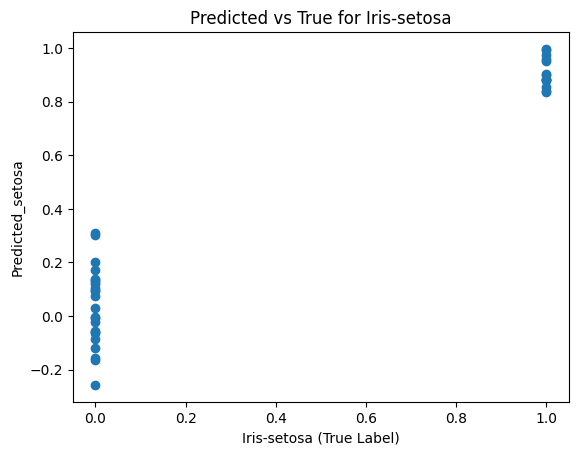

In [87]:
plt.scatter(y_test_prediction_merge['Iris-setosa'], y_test_prediction_merge['Predicted_setosa'])
plt.xlabel('Iris-setosa (True Label)')
plt.ylabel('Predicted_setosa')
plt.title('Predicted vs True for Iris-setosa')
plt.show()

In [88]:
#if the prediction value if greater than 0.5 then it is true else false
y_test_prediction_merge['Predicted_setosa'] = y_test_prediction_merge['Predicted_setosa'].apply(lambda x: 'True' if x > 0.5 else 'False')
y_test_prediction_merge['Predicted_versicolor'] = y_test_prediction_merge['Predicted_versicolor'].apply(lambda x: 'True' if x > 0.5 else 'False')
y_test_prediction_merge['Predicted_virginica'] = y_test_prediction_merge['Predicted_virginica'].apply(lambda x: 'True' if x > 0.5 else 'False')
y_test_prediction_merge



,Iris-setosa,Iris-versicolor,Iris-virginica,Predicted_setosa,Predicted_versicolor,Predicted_virginica
0,True,False,False,True,False,False
1,False,True,False,False,False,True
2,False,False,True,False,False,True
3,False,False,True,False,False,True
4,False,True,False,False,True,False
5,False,False,True,False,False,True
6,False,True,False,False,True,False
7,False,True,False,False,False,False
8,False,True,False,False,False,True
9,True,False,False,True,False,False
